<a href="https://colab.research.google.com/github/NBK-code/Time_Series_Data/blob/main/Time_Series_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13582336/13568290 [==============================] - 0s 0us/step


In [3]:
df = pd.read_csv(csv_path)
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [4]:
df = df[5::6]
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [5]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df[:26]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


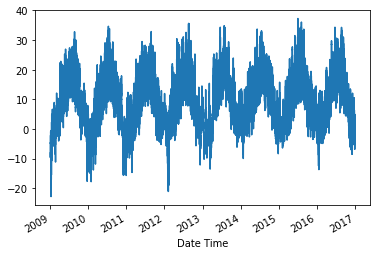

In [6]:
temp = df['T (degC)']
temp.plot()

In [7]:
temp

Date Time
2009-01-01 01:00:00   -8.05
2009-01-01 02:00:00   -8.88
2009-01-01 03:00:00   -8.81
2009-01-01 04:00:00   -9.05
2009-01-01 05:00:00   -9.63
                       ... 
2016-12-31 19:10:00   -0.98
2016-12-31 20:10:00   -1.40
2016-12-31 21:10:00   -2.75
2016-12-31 22:10:00   -2.89
2016-12-31 23:10:00   -3.93
Name: T (degC), Length: 70091, dtype: float64

In [8]:
# [[[1], [2], [3], [4], [5]]]     [6]
# [[[2], [3], [4], [5], [6]]]     [7]
# [[[3], [4], [5], [6], [7]]]     [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [9]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((70086, 5, 1), (70086,))

In [10]:
X_train1, y_train1 = X1[:60000], y1[:60000]
X_val1, y_val1 = X1[60000:65000], y1[60000:65000]
X_test1, y_test1 = X1[65000:], y1[65000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [12]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [13]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
1867/1875 [============================>.] - ETA: 0s - loss: 57.9188 - root_mean_squared_error: 7.6104

1875/1875 [==============================] - 14s 7ms/step - loss: 57.7118 - root_mean_squared_error: 7.5968 - val_loss: 2.3592 - val_root_mean_squared_error: 1.5360
Epoch 2/10
1873/1875 [============================>.] - ETA: 0s - loss: 4.2358 - root_mean_squared_error: 2.0581

1875/1875 [==============================] - 12s 7ms/step - loss: 4.2345 - root_mean_squared_error: 2.0578 - val_loss: 0.7094 - val_root_mean_squared_error: 0.8423
Epoch 3/10
1873/1875 [============================>.] - ETA: 0s - loss: 1.2326 - root_mean_squared_error: 1.1102

1875/1875 [==============================] - 12s 6ms/step - loss: 1.2329 - root_mean_squared_error: 1.1104 - val_loss: 0.5646 - val_root_mean_squared_error: 0.7514
Epoch 4/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.8094 - root_mean_squared_error: 0.8997

1875/1875 [==============================] - 12s 6ms/step - loss: 0.8086 - root_mean_squared_error: 0.8992 - val_loss: 0.5482 - val_root_mean_squared_error: 0.7404
Epoch 5/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.7082 - root_mean_squared_error: 0.8415

1875/1875 [==============================] - 13s 7ms/step - loss: 0.7074 - root_mean_squared_error: 0.8410 - val_loss: 0.5162 - val_root_mean_squared_error: 0.7185
Epoch 6/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.6742 - root_mean_squared_error: 0.8211

1875/1875 [==============================] - 11s 6ms/step - loss: 0.6739 - root_mean_squared_error: 0.8209 - val_loss: 0.5117 - val_root_mean_squared_error: 0.7153
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6600 - root_mean_squared_error: 0.8124 - val_loss: 0.5246 - val_root_mean_squared_error: 0.7243
Epoch 8/10
1875/1875 [==============================] - ETA: 0s - loss: 0.6535 - root_mean_squared_error: 0.8084

1875/1875 [==============================] - 12s 7ms/step - loss: 0.6535 - root_mean_squared_error: 0.8084 - val_loss: 0.4981 - val_root_mean_squared_error: 0.7057
Epoch 9/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.6485 - root_mean_squared_error: 0.8053

1875/1875 [==============================] - 12s 6ms/step - loss: 0.6479 - root_mean_squared_error: 0.8049 - val_loss: 0.4941 - val_root_mean_squared_error: 0.7029
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6457 - root_mean_squared_error: 0.8035 - val_loss: 0.5148 - val_root_mean_squared_error: 0.7175


In [14]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [15]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

,Train Predictions,Actuals
0,-9.920680,-9.67
1,-9.698513,-9.17
2,-8.882278,-8.10
3,-7.442008,-7.66
4,-7.302177,-7.04
...,...,...
59995,6.041608,6.07
59996,7.255135,9.88
59997,11.900678,13.53
59998,15.838892,15.43


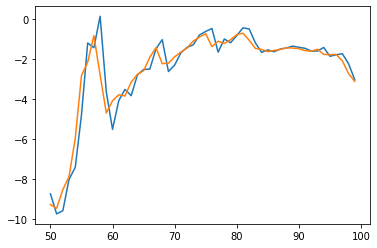

In [16]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [17]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

,Val Predictions,Actuals
0,15.345423,14.02
1,13.204565,13.67
2,12.930614,12.27
3,11.411858,11.19
4,10.338483,10.85
...,...,...
4995,17.358225,18.27
4996,17.316235,17.85
4997,17.211323,16.65
4998,15.782710,15.85


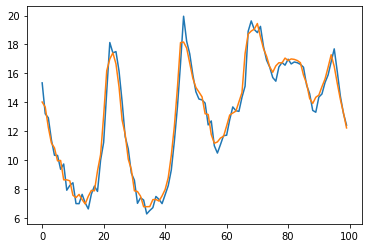

In [18]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [19]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

,Test Predictions,Actuals
0,14.282096,13.99
1,13.129074,13.46
2,12.771095,12.93
3,12.385372,12.43
4,11.940548,12.17
...,...,...
5081,-1.361175,-0.98
5082,-1.386082,-1.40
5083,-1.557977,-2.75
5084,-3.143658,-2.89


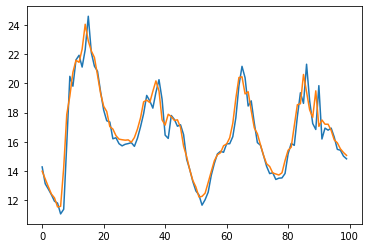

In [20]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

In [21]:
# Part 2

In [22]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

(      Predictions  Actuals
 0       14.282096    13.99
 1       13.129074    13.46
 2       12.771095    12.93
 3       12.385372    12.43
 4       11.940548    12.17
 ...           ...      ...
 5081    -1.361175    -0.98
 5082    -1.386082    -1.40
 5083    -1.557977    -2.75
 5084    -3.143658    -2.89
 5085    -3.031850    -3.93
 
 [5086 rows x 2 columns], 0.6462854064216325)

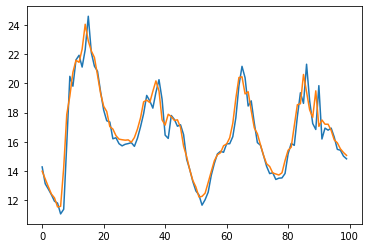

In [23]:
plot_predictions1(model1, X_test1, y_test1)

In [24]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 2056      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [25]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [26]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 7.4566 - root_mean_squared_error: 2.7307 - val_loss: 0.9723 - val_root_mean_squared_error: 0.9861
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0084 - root_mean_squared_error: 1.0042 - val_loss: 0.6488 - val_root_mean_squared_error: 0.8055
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7711 - root_mean_squared_error: 0.8781 - val_loss: 0.5354 - val_root_mean_squared_error: 0.7317
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6980 - root_mean_squared_error: 0.8355 - val_loss: 0.5179 - val_root_mean_squared_error: 0.7197
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6697 - root_mean_squared_error: 0.8184 - val_loss: 0.4965 - val_root_mean_squared_error: 0.7046
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6629 - root_mean_squared_error: 0.8142 - val_loss: 0

In [27]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [28]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [29]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp3])

Epoch 1/10
1874/1875 [============================>.] - ETA: 0s - loss: 34.1500 - root_mean_squared_error: 5.8438

1875/1875 [==============================] - 13s 6ms/step - loss: 34.1339 - root_mean_squared_error: 5.8424 - val_loss: 1.1389 - val_root_mean_squared_error: 1.0672
Epoch 2/10
1875/1875 [==============================] - ETA: 0s - loss: 2.0569 - root_mean_squared_error: 1.4342

1875/1875 [==============================] - 12s 6ms/step - loss: 2.0569 - root_mean_squared_error: 1.4342 - val_loss: 0.6326 - val_root_mean_squared_error: 0.7953
Epoch 3/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.9023 - root_mean_squared_error: 0.9499

1875/1875 [==============================] - 11s 6ms/step - loss: 0.9016 - root_mean_squared_error: 0.9495 - val_loss: 0.5527 - val_root_mean_squared_error: 0.7434
Epoch 4/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.7147 - root_mean_squared_error: 0.8454

1875/1875 [==============================] - 11s 6ms/step - loss: 0.7156 - root_mean_squared_error: 0.8459 - val_loss: 0.5121 - val_root_mean_squared_error: 0.7156
Epoch 5/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.6705 - root_mean_squared_error: 0.8188

1875/1875 [==============================] - 12s 6ms/step - loss: 0.6704 - root_mean_squared_error: 0.8188 - val_loss: 0.5030 - val_root_mean_squared_error: 0.7092
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.6553 - root_mean_squared_error: 0.8095 - val_loss: 0.5148 - val_root_mean_squared_error: 0.7175
Epoch 7/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.6487 - root_mean_squared_error: 0.8054

1875/1875 [==============================] - 11s 6ms/step - loss: 0.6488 - root_mean_squared_error: 0.8055 - val_loss: 0.5029 - val_root_mean_squared_error: 0.7092
Epoch 8/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.6460 - root_mean_squared_error: 0.8037

1875/1875 [==============================] - 11s 6ms/step - loss: 0.6455 - root_mean_squared_error: 0.8034 - val_loss: 0.4941 - val_root_mean_squared_error: 0.7029
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6432 - root_mean_squared_error: 0.8020 - val_loss: 0.5056 - val_root_mean_squared_error: 0.7111
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6416 - root_mean_squared_error: 0.8010 - val_loss: 0.5013 - val_root_mean_squared_error: 0.7080


In [31]:
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09
2016-12-31 20:10:00,-1.40,1.483215e+09
2016-12-31 21:10:00,-2.75,1.483219e+09


In [32]:
day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df.head()

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,1.230786e+09,0.965926,0.258819,0.012916,0.999917


In [33]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917


In [34]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [35]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((70085, 6, 5), (70085,))

In [36]:
X2_train, y2_train = X2[:60000], y2[:60000]
X2_val, y2_val = X2[60000:65000], y2[60000:65000]
X2_test, y2_test = X2[65000:], y2[65000:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((60000, 6, 5), (60000,), (5000, 6, 5), (5000,), (5085, 6, 5), (5085,))

In [37]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])
                           
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

In [ ]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

In [39]:
model4 = Sequential()
model4.add(InputLayer((6, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                17920     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [40]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [41]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
1863/1875 [============================>.] - ETA: 0s - loss: 34.4839 - root_mean_squared_error: 5.8723

1875/1875 [==============================] - 15s 7ms/step - loss: 34.3136 - root_mean_squared_error: 5.8578 - val_loss: 4.4923 - val_root_mean_squared_error: 2.1195
Epoch 2/10
1873/1875 [============================>.] - ETA: 0s - loss: 5.5525 - root_mean_squared_error: 2.3564

1875/1875 [==============================] - 12s 7ms/step - loss: 5.5493 - root_mean_squared_error: 2.3557 - val_loss: 2.0379 - val_root_mean_squared_error: 1.4276
Epoch 3/10
1867/1875 [============================>.] - ETA: 0s - loss: 1.9736 - root_mean_squared_error: 1.4049

1875/1875 [==============================] - 13s 7ms/step - loss: 1.9706 - root_mean_squared_error: 1.4038 - val_loss: 0.9256 - val_root_mean_squared_error: 0.9621
Epoch 4/10
1864/1875 [============================>.] - ETA: 0s - loss: 1.0597 - root_mean_squared_error: 1.0294

1875/1875 [==============================] - 13s 7ms/step - loss: 1.0583 - root_mean_squared_error: 1.0287 - val_loss: 0.7231 - val_root_mean_squared_error: 0.8504
Epoch 5/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.7939 - root_mean_squared_error: 0.8910

1875/1875 [==============================] - 14s 7ms/step - loss: 0.7930 - root_mean_squared_error: 0.8905 - val_loss: 0.5544 - val_root_mean_squared_error: 0.7446
Epoch 6/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.6377 - root_mean_squared_error: 0.7986

1875/1875 [==============================] - 13s 7ms/step - loss: 0.6386 - root_mean_squared_error: 0.7991 - val_loss: 0.5035 - val_root_mean_squared_error: 0.7095
Epoch 7/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.5663 - root_mean_squared_error: 0.7526

1875/1875 [==============================] - 14s 7ms/step - loss: 0.5660 - root_mean_squared_error: 0.7523 - val_loss: 0.4251 - val_root_mean_squared_error: 0.6520
Epoch 8/10
1875/1875 [==============================] - ETA: 0s - loss: 0.5390 - root_mean_squared_error: 0.7342

1875/1875 [==============================] - 13s 7ms/step - loss: 0.5390 - root_mean_squared_error: 0.7342 - val_loss: 0.4087 - val_root_mean_squared_error: 0.6393
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5279 - root_mean_squared_error: 0.7266 - val_loss: 0.4182 - val_root_mean_squared_error: 0.6467
Epoch 10/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.5222 - root_mean_squared_error: 0.7227

1875/1875 [==============================] - 13s 7ms/step - loss: 0.5230 - root_mean_squared_error: 0.7232 - val_loss: 0.4053 - val_root_mean_squared_error: 0.6366


(      Predictions  Actuals
 0       13.367649    13.46
 1       12.939911    12.93
 2       12.507183    12.43
 3       12.165396    12.17
 4       12.265569    11.55
 ...           ...      ...
 5080    -1.135231    -0.98
 5081    -1.526232    -1.40
 5082    -1.757380    -2.75
 5083    -3.081116    -2.89
 5084    -3.204908    -3.93
 
 [5085 rows x 2 columns], 0.4742050998000069)

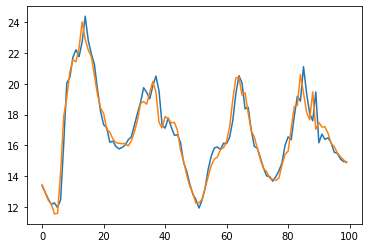

In [42]:
plot_predictions1(model4, X2_test, y2_test)

In [43]:
p_temp_df = pd.concat([df['p (mbar)'], temp_df], axis=1)
p_temp_df.head()

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,996.62,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,996.84,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,996.99,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,997.46,-9.63,0.965926,0.258819,0.012916,0.999917


In [44]:
def df_to_X_y3(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

In [45]:
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape

((70084, 7, 6), (70084, 2))

In [46]:
X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:65000], y3[60000:65000]
X3_test, y3_test = X3[65000:], y3[65000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((60000, 7, 6), (60000, 2), (5000, 7, 6), (5000, 2), (5084, 7, 6), (5084, 2))

In [47]:
p_training_mean3 = np.mean(X3_train[:, :, 0])
p_training_std3 = np.std(X3_train[:, :, 0])

temp_training_mean3 = np.mean(X3_train[:, :, 1])
temp_training_std3 = np.std(X3_train[:, :, 1])

def preprocess3(X):
  X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
  X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3

def preprocess_output3(y):
  y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
  y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
  return y

In [48]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

In [49]:
preprocess_output3(y3_train)
preprocess_output3(y3_val)
preprocess_output3(y3_test)

array([[-0.7934386 ,  0.41245076],
       [-0.76312281,  0.35368268],
       [-0.72189335,  0.32312327],
       ...,
       [ 1.48145784, -1.43051636],
       [ 1.41597574, -1.44697142],
       [ 1.35049365, -1.56920903]])

In [50]:
model5 = Sequential()
model5.add(InputLayer((7, 6)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear'))

model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                18176     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 2)                 18        
                                                                 
Total params: 18,714
Trainable params: 18,714
Non-trainable params: 0
_________________________________________________________________


In [51]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [52]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])

Epoch 1/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.1469 - root_mean_squared_error: 0.3833

1875/1875 [==============================] - 16s 7ms/step - loss: 0.1467 - root_mean_squared_error: 0.3830 - val_loss: 0.0330 - val_root_mean_squared_error: 0.1816
Epoch 2/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0251 - root_mean_squared_error: 0.1585

1875/1875 [==============================] - 15s 8ms/step - loss: 0.0251 - root_mean_squared_error: 0.1584 - val_loss: 0.0168 - val_root_mean_squared_error: 0.1296
Epoch 3/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.0127 - root_mean_squared_error: 0.1127

1875/1875 [==============================] - 14s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1127 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0883
Epoch 4/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.0078 - root_mean_squared_error: 0.0885

1875/1875 [==============================] - 14s 7ms/step - loss: 0.0078 - root_mean_squared_error: 0.0885 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0740
Epoch 5/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.0793

1875/1875 [==============================] - 14s 8ms/step - loss: 0.0063 - root_mean_squared_error: 0.0793 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0688
Epoch 6/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.0744

1875/1875 [==============================] - 15s 8ms/step - loss: 0.0055 - root_mean_squared_error: 0.0744 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0639
Epoch 7/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.0718

1875/1875 [==============================] - 15s 8ms/step - loss: 0.0052 - root_mean_squared_error: 0.0718 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0622
Epoch 8/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.0707

1875/1875 [==============================] - 14s 7ms/step - loss: 0.0050 - root_mean_squared_error: 0.0707 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0621
Epoch 9/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.0700

1875/1875 [==============================] - 14s 7ms/step - loss: 0.0049 - root_mean_squared_error: 0.0700 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0605
Epoch 10/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.0695

1875/1875 [==============================] - 15s 8ms/step - loss: 0.0048 - root_mean_squared_error: 0.0695 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0602


In [53]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
  p_actuals, temp_actuals = y[:, 0], y[:, 1]
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]

,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.389640,0.412451,-0.786872,-0.793439
1,0.345535,0.353683,-0.773526,-0.763123
2,0.308708,0.323123,-0.737079,-0.721893
3,0.315900,0.250251,-0.680743,-0.652773
4,0.277359,0.254952,-0.593081,-0.652773
...,...,...,...,...
95,0.670573,0.716869,-0.410185,-0.416310
96,0.633879,0.687485,-0.411756,-0.399333
97,0.619147,0.663978,-0.394984,-0.399333
98,0.623090,0.641646,-0.383341,-0.400546


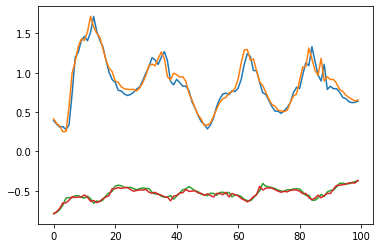

In [54]:
plot_predictions2(model5, X3_test, y3_test)

In [55]:
def postprocess_temp(arr):
  arr = (arr*temp_training_std3) + temp_training_mean3
  return arr

def postprocess_p(arr):
  arr = (arr*p_training_std3) + p_training_mean3
  return arr

In [56]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = postprocess_p(predictions[:, 0]), postprocess_temp(predictions[:, 1])
  p_actuals, temp_actuals = postprocess_p(y[:, 0]), postprocess_temp(y[:, 1])
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]

,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,12.735928,12.93,982.484192,982.43
1,12.360681,12.43,982.594238,982.68
2,12.047353,12.17,982.894775,983.02
3,12.108547,11.55,983.359375,983.59
4,11.780634,11.59,984.082275,983.59
...,...,...,...,...
95,15.126106,15.52,985.590515,985.54
96,14.813911,15.27,985.577576,985.68
97,14.688574,15.07,985.715881,985.68
98,14.722126,14.88,985.811890,985.67


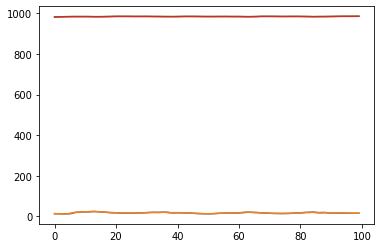

In [57]:
post_processed_df = plot_predictions2(model5, X3_test, y3_test)
post_processed_df

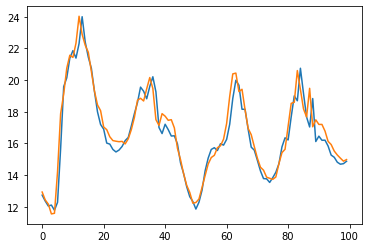

In [58]:
start, end = 0, 100
plt.plot(post_processed_df['Temperature Predictions'][start:end])
plt.plot(post_processed_df['Temperature Actuals'][start:end])

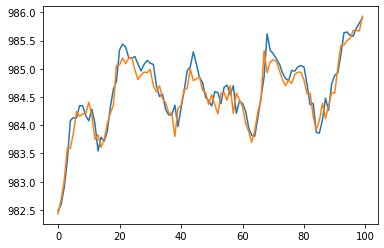

In [59]:
plt.plot(post_processed_df['Pressure Predictions'][start:end])
plt.plot(post_processed_df['Pressure Actuals'][start:end])

In [60]:
model6 = Sequential()
model6.add(InputLayer((7, 6)))
model6.add(LSTM(32, return_sequences=True))
model6.add(LSTM(64))
model6.add(Dense(8, 'relu'))
model6.add(Dense(2, 'linear'))

model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 7, 32)             4992      
                                                                 
 lstm_4 (LSTM)               (None, 64)                24832     
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 2)                 18        
                                                                 
Total params: 30,362
Trainable params: 30,362
Non-trainable params: 0
_________________________________________________________________


In [61]:
cp6 = ModelCheckpoint('model6/', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [62]:
model6.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp6])

Epoch 1/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.1552 - root_mean_squared_error: 0.3939

1875/1875 [==============================] - 27s 13ms/step - loss: 0.1550 - root_mean_squared_error: 0.3936 - val_loss: 0.0469 - val_root_mean_squared_error: 0.2165
Epoch 2/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0374 - root_mean_squared_error: 0.1934

1875/1875 [==============================] - 24s 13ms/step - loss: 0.0374 - root_mean_squared_error: 0.1934 - val_loss: 0.0278 - val_root_mean_squared_error: 0.1667
Epoch 3/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0188 - root_mean_squared_error: 0.1371

1875/1875 [==============================] - 23s 12ms/step - loss: 0.0188 - root_mean_squared_error: 0.1371 - val_loss: 0.0119 - val_root_mean_squared_error: 0.1089
Epoch 4/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0105 - root_mean_squared_error: 0.1025

1875/1875 [==============================] - 24s 13ms/step - loss: 0.0105 - root_mean_squared_error: 0.1025 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0896
Epoch 5/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0082 - root_mean_squared_error: 0.0907

1875/1875 [==============================] - 24s 13ms/step - loss: 0.0082 - root_mean_squared_error: 0.0907 - val_loss: 0.0062 - val_root_mean_squared_error: 0.0785
Epoch 6/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.0069 - root_mean_squared_error: 0.0831

1875/1875 [==============================] - 23s 13ms/step - loss: 0.0069 - root_mean_squared_error: 0.0831 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0730
Epoch 7/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.0780

1875/1875 [==============================] - 23s 12ms/step - loss: 0.0061 - root_mean_squared_error: 0.0780 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0691
Epoch 8/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.0753

1875/1875 [==============================] - 23s 12ms/step - loss: 0.0057 - root_mean_squared_error: 0.0753 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0659
Epoch 9/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.0736

1875/1875 [==============================] - 23s 12ms/step - loss: 0.0054 - root_mean_squared_error: 0.0736 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0645
Epoch 10/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0053 - root_mean_squared_error: 0.0726 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0664


In [ ]:
model7 = Sequential()
model7.add(InputLayer((7, 6)))
model7.add(Conv1D(64, kernel_size=2, activation='relu'))
model7.add(Flatten())
model7.add(Dense(8, 'relu'))
model7.add(Dense(2, 'linear'))
model7.summary()

cp7 = ModelCheckpoint('model6/', save_best_only=True)
model7.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 6, 64)             832       
_________________________________________________________________
flatten_2 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 3080      
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 18        
Total params: 3,930
Trainable params: 3,930
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model7.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp7])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1150 - root_mean_squared_error: 0.3390 - val_loss: 0.0223 - val_root_mean_squared_error: 0.1493
INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0160 - root_mean_squared_error: 0.1263 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1057
INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0099 - root_mean_squared_error: 0.0993 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0869
INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0078 - root_mean_squared_error: 0.0886 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0780
INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0069 - root_mean_squared_error: 0.0834 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0752
INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0064 - root_mean_squared_error: 0.0803 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0721
INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0061 - root_mean_squared_error: 0.0783 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0693
INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0059 - root_mean_squared_error: 0.0767 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0676
INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0057 - root_mean_squared_error: 0.0757 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0669
INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0056 - root_mean_squared_error: 0.0749 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0660
INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets
